# Librerias


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os

In [14]:
%ls

 El volumen de la unidad D es DATOS
 El número de serie del volumen es: 98EC-E01D

 Directorio de d:\Desktop\Data science Bootcamp\Actividades Bootcamp DS

04/08/2024  07:40 p. m.    <DIR>          .
04/08/2024  07:44 p. m.    <DIR>          ..
04/08/2024  03:55 p. m.           227.836 actividad1.ipynb
04/08/2024  08:11 p. m.           176.819 actividad2.ipynb
14/02/2024  10:16 p. m.         1.458.521 video_games_sales.csv
               3 archivos      1.863.176 bytes
               2 dirs  478.088.224.768 bytes libres


In [3]:
files= os.listdir()
file= [x for x in files if 'video_' in x][0]
data=pd.read_csv(f'./{file}',sep=',')
data.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [5]:
data.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

# Matplolib

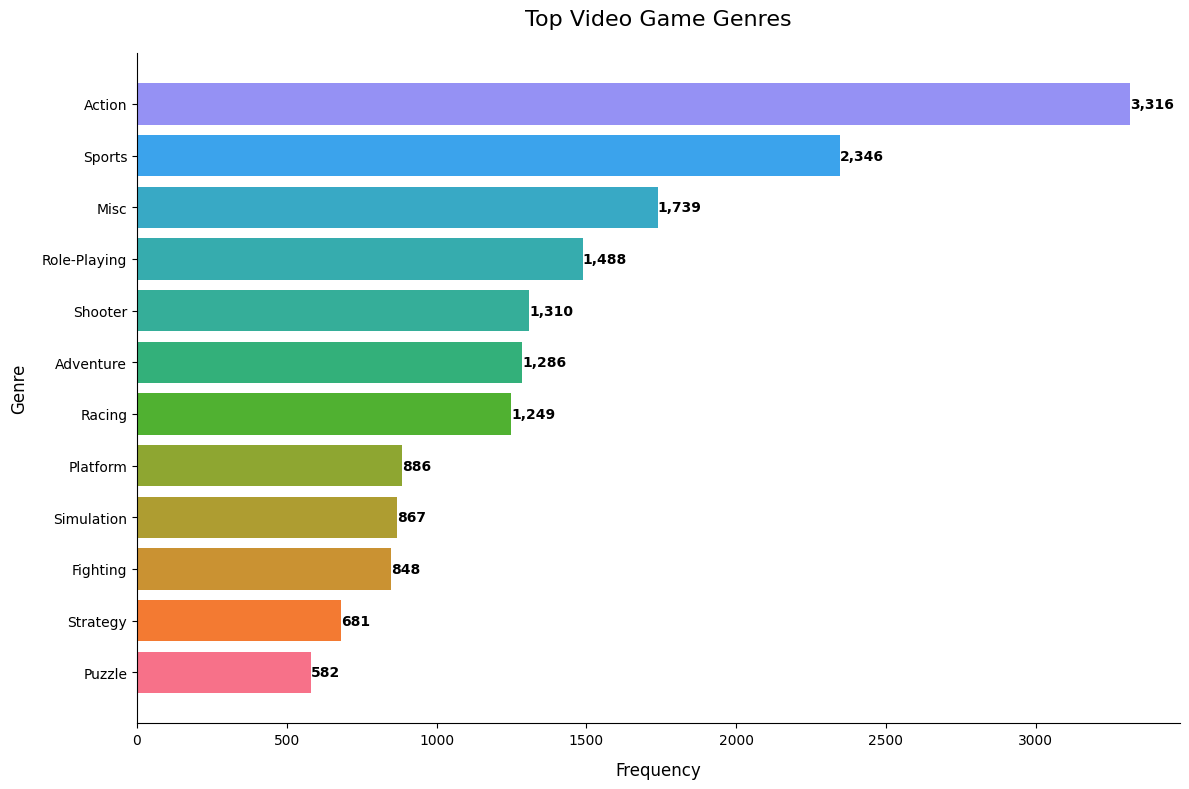

In [8]:
genre_counts = data['genre'].value_counts()
genre_counts_sorted = genre_counts.sort_values(ascending=True)

# Top N generos
N = 15
top_genres = genre_counts_sorted.tail(N)

fig, ax = plt.subplots(figsize=(12, 8))

# Crear barras horizontal
bars = ax.barh(top_genres.index, top_genres.values, color=sns.color_palette("husl", N))

# Modificar apariencia
ax.set_xlabel('Frequency', fontsize=12, labelpad=10)
ax.set_ylabel('Genre', fontsize=12, labelpad=10)
ax.set_title('Top Video Game Genres', fontsize=16, pad=20)

# Remover spins
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels 
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'{int(width):,}', 
            ha='left', va='center', fontsize=10, fontweight='bold')

# ajustar layout
plt.tight_layout()
plt.show()

In [9]:
data['year']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: year, Length: 16598, dtype: float64

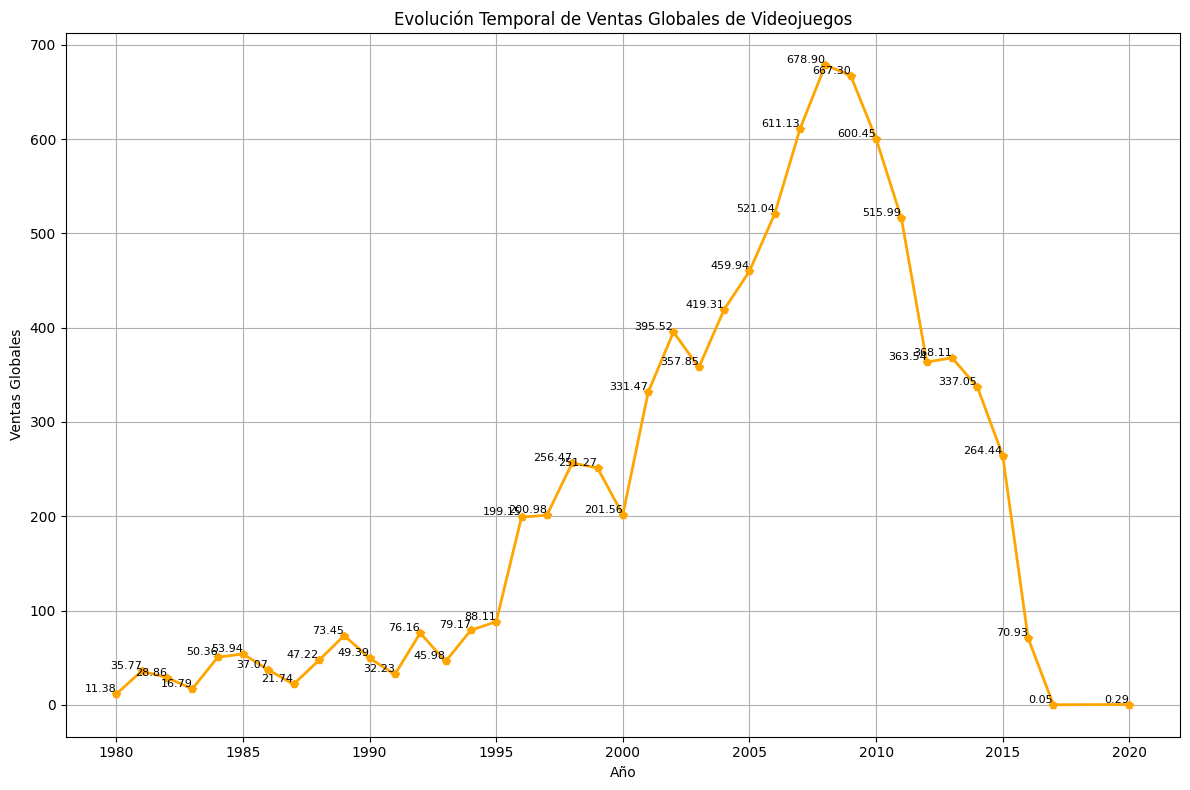

In [10]:
yearly_sales = data.groupby('year')['global_sales'].sum()

plt.figure(figsize=(12, 8))
plt.plot(yearly_sales.index, yearly_sales.values, marker='p', color='orange', linestyle='-', linewidth=2)

plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.title('Evolución Temporal de Ventas Globales de Videojuegos')
plt.grid(True)

# Agregar anotaciones
for year, sales in yearly_sales.items():
    plt.text(year, sales, f'{sales:.2f}', ha='right', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

# Seaborn


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


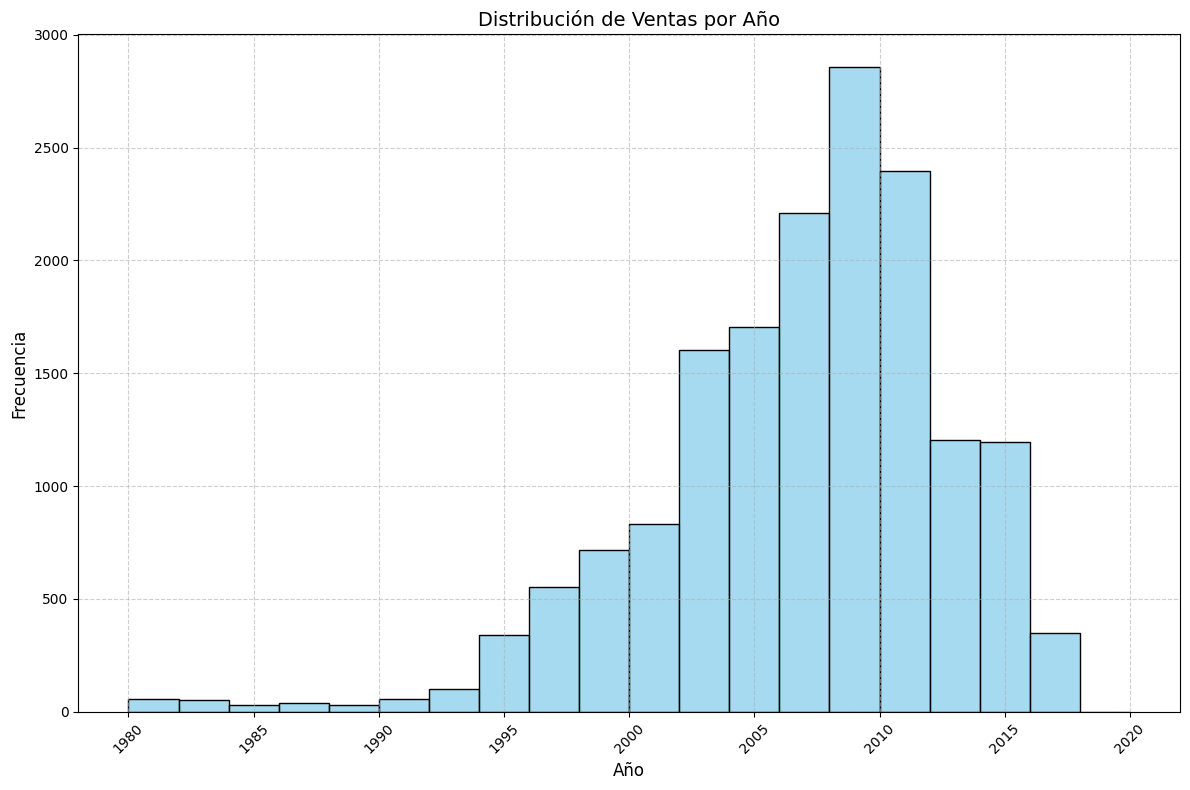

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='year', bins=20, kde=False, color='skyblue')

# Labels y titulo
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Ventas por Año', fontsize=14)

# Grid y layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
data['name'].value_counts()[0:10]

name
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Cars                            8
FIFA Soccer 13                  8
LEGO The Hobbit                 8
Monopoly                        8
LEGO Jurassic World             8
Name: count, dtype: int64

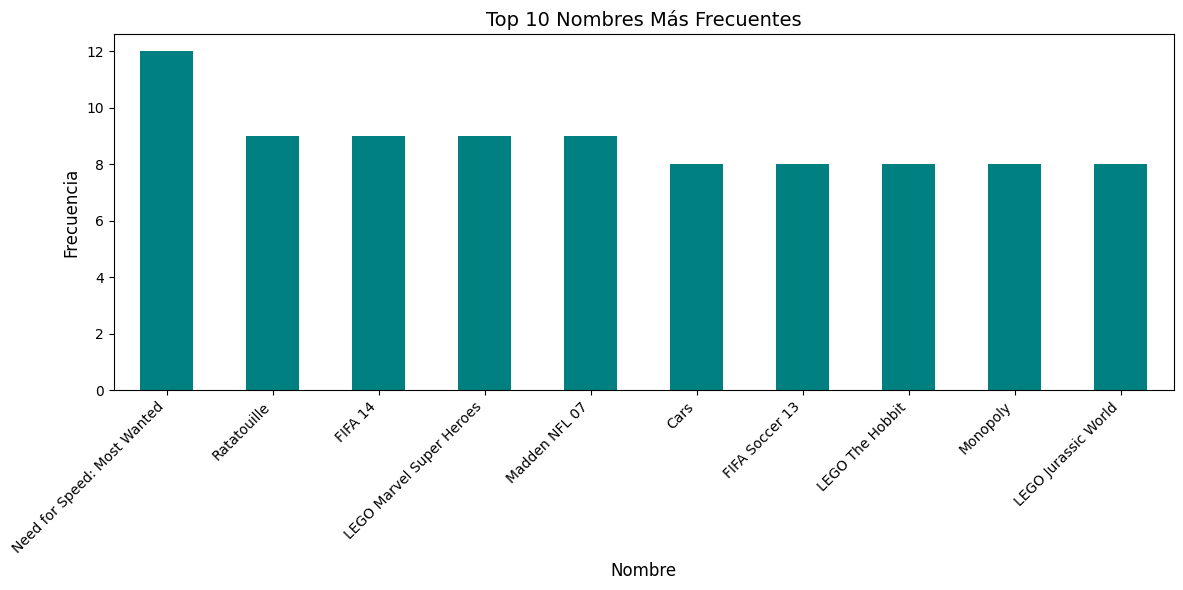

In [13]:
plt.figure(figsize=(12, 6))
data['name'].value_counts()[0:10].plot(kind='bar', color='teal')

plt.xlabel('Nombre', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Top 10 Nombres Más Frecuentes', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotly

In [25]:
%pip install plotly



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import plotly.express as px # type: ignore
data = pd.read_csv('video_games_sales.csv')
genre_sales = data.groupby('genre')['global_sales'].sum().reset_index()
fig = px.bar(genre_sales, x='global_sales', y='genre', orientation='h',
             title='Global Sales by Genre of Video Games',
             labels={'global_sales': 'Global Sales', 'genre': 'Genre'})
fig.show()